In [1]:
import numpy as np
import pandas as pd

import requests
import os

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

from datetime import datetime

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# This will allow us to avoid a FutureWarning when plotting.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# read data
df = pd.read_csv('./output/air_quality_by_state_daily.csv')

In [3]:
# Change date column to be datetime dtype
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.head()

,state_name,county_name,date,aqi,category,defining_parameter
0,Alabama,Baldwin,2000-01-16,25,Good,PM2.5
1,Alabama,Baldwin,2000-01-19,46,Good,PM2.5
2,Alabama,Baldwin,2000-01-22,36,Good,PM2.5
3,Alabama,Baldwin,2000-01-25,26,Good,PM2.5
4,Alabama,Baldwin,2000-01-28,32,Good,PM2.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965799 entries, 0 to 6965798
Data columns (total 6 columns):
 #   Column              Dtype         
---  ------              -----         
 0   state_name          object        
 1   county_name         object        
 2   date                datetime64[ns]
 3   aqi                 int64         
 4   category            object        
 5   defining_parameter  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 318.9+ MB


In [6]:
df_hazard = df[df['aqi'] > 500]

In [7]:
df_hazard['defining_parameter'].unique()

array(['PM10', 'PM2.5'], dtype=object)

In [8]:
df_hazard['defining_parameter'].value_counts()

PM10     480
PM2.5     34
Name: defining_parameter, dtype: int64

In [9]:
df_hazard['county_name'].value_counts()

Mono                     166
Inyo                     153
Pinal                     66
Washoe                    26
Dona Ana                  13
Luna                      10
Riverside                  7
Imperial                   6
El Paso                    5
Trinity                    4
Klickitat                  4
Marion                     4
Lane                       3
Kings                      3
Missoula                   3
Deschutes                  3
Platte                     3
Benton                     3
Walla Walla                3
Prowers                    2
Jefferson                  2
Campbell                   2
Ventura                    2
Tulare                     1
Jasper                     1
Sweetwater                 1
Stevens                    1
Maries                     1
Clark                      1
Linn                       1
Klamath                    1
Alamosa                    1
Jackson                    1
Maricopa                   1
Crook         

In [10]:
df_hazard['date'].value_counts()

2020-09-12    9
2020-09-13    7
2020-09-08    3
2012-03-18    3
2022-04-11    3
             ..
2006-02-14    1
2006-01-31    1
2006-01-23    1
2006-01-22    1
2022-02-19    1
Name: date, Length: 462, dtype: int64

In [11]:
df_daily_state = df.groupby(['state_name', 'date'])['aqi'].mean().reset_index()

In [12]:
df_daily_state.head()

,state_name,date,aqi
0,Alabama,2000-01-01,48.150000
1,Alabama,2000-01-02,39.333333
2,Alabama,2000-01-03,46.333333
3,Alabama,2000-01-04,30.076923
4,Alabama,2000-01-05,33.666667


In [13]:
df_daily_state.sort_values('aqi')

,state_name,date,aqi
99333,Hawaii,2022-07-31,0.000000
99326,Hawaii,2022-07-24,0.000000
99325,Hawaii,2022-07-23,0.000000
381114,Vermont,2022-07-01,0.500000
16550,Alaska,2022-09-01,1.000000
...,...,...,...
36810,California,2009-11-20,330.500000
34327,California,2003-02-02,351.622642
314164,Oregon,2020-09-13,374.136364
314163,Oregon,2020-09-12,403.652174


In [14]:
df_daily_all = df_daily_state.groupby(['date'])['aqi'].mean().reset_index()

In [15]:
df_daily_all.head()

,date,aqi
0,2000-01-01,57.435300
1,2000-01-02,35.153369
2,2000-01-03,31.301916
3,2000-01-04,31.785806
4,2000-01-05,27.697871


In [16]:
df_daily_all.describe()

,aqi
count,8342.000000
mean,41.147542
std,8.438637
min,12.458333
25%,35.410050
50%,39.700597
75%,45.142269
max,92.006454


In [17]:
df_daily_all.shape

(8342, 2)

In [18]:
# Set the index to be date
df_daily_all.set_index('date', inplace=True)

In [19]:
df_daily_all.head(), df_daily_all.tail() 

(                  aqi
 date                 
 2000-01-01  57.435300
 2000-01-02  35.153369
 2000-01-03  31.301916
 2000-01-04  31.785806
 2000-01-05  27.697871,
                   aqi
 date                 
 2022-10-29  35.131624
 2022-10-30  34.232265
 2022-10-31  39.330769
 2022-11-01  12.458333
 2022-11-02  40.000000)

In [20]:
# adopted from class
# function for plot 

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
        
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18);

### Daily Change in AQI, 2000 - 2022

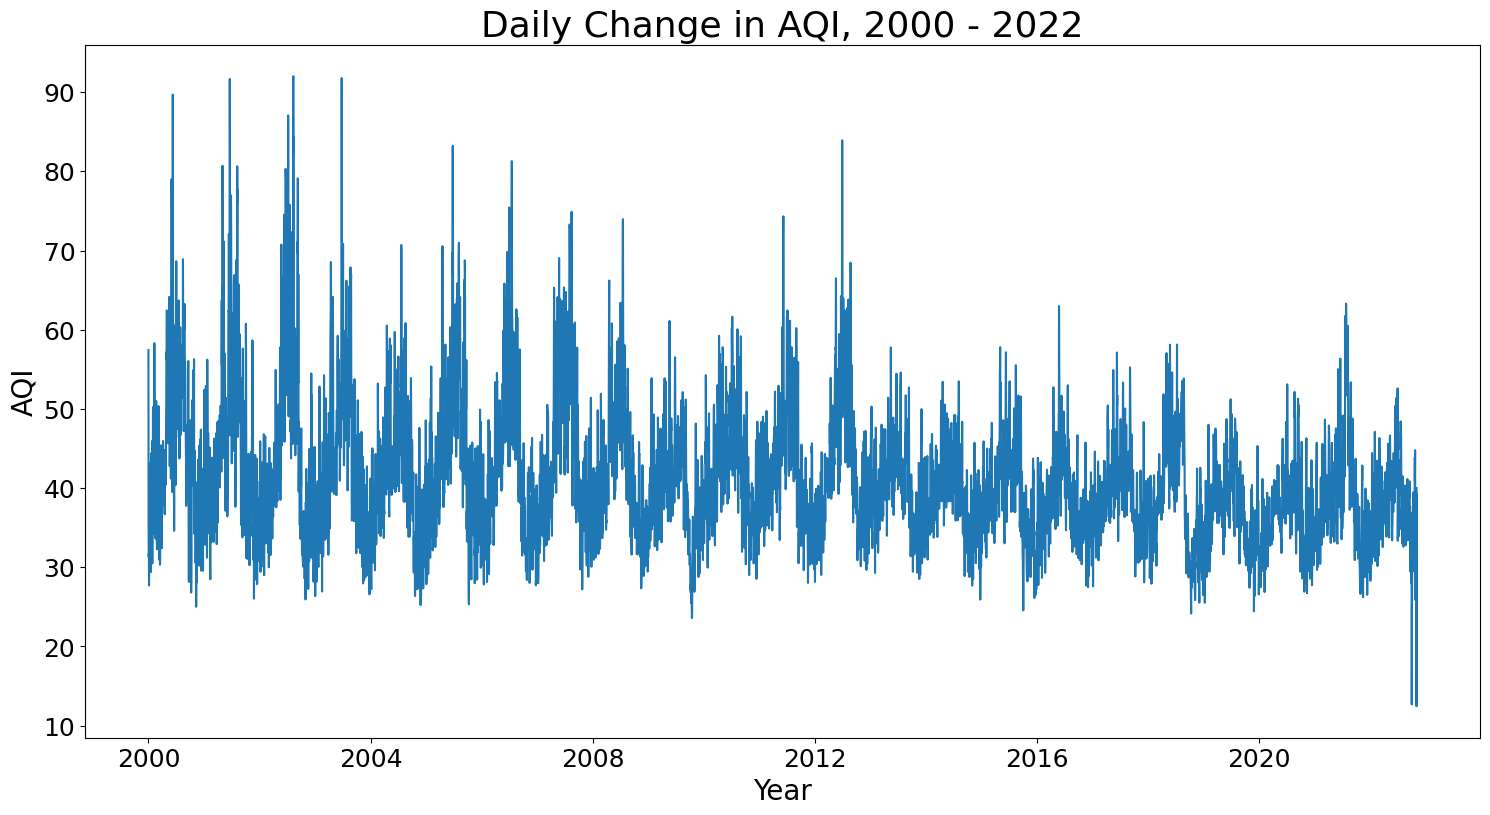

In [21]:
plot_series(df_daily_all, cols=['aqi'], title="Daily Change in AQI, 2000 - 2022", xlab='Year', ylab = 'AQI')

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

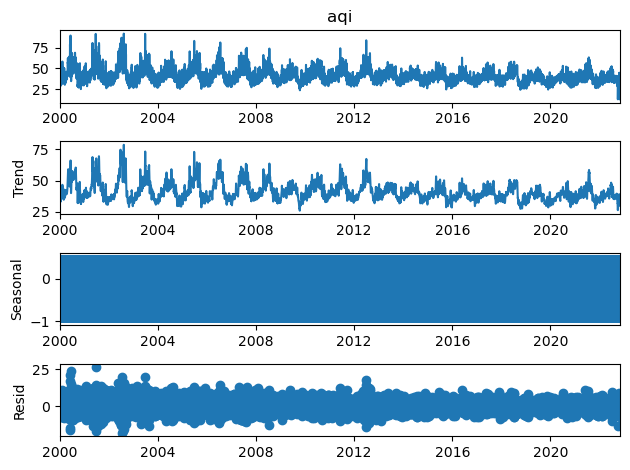

In [24]:
# adopted from class
# Decompose time series into trend, seasonal, and residual components.
decomp =seasonal_decompose(df_daily_all['aqi'])

# Plot the decomposed time series.
decomp.plot();

### Monthly Change in AQI, 2000 - 2022

In [25]:
# resample by month
df_m = df_daily_all.resample('M').mean()

In [26]:
df_m.head()

,aqi
date,
2000-01-31,36.279317
2000-02-29,40.800939
2000-03-31,38.986306
2000-04-30,43.198448
2000-05-31,51.832154


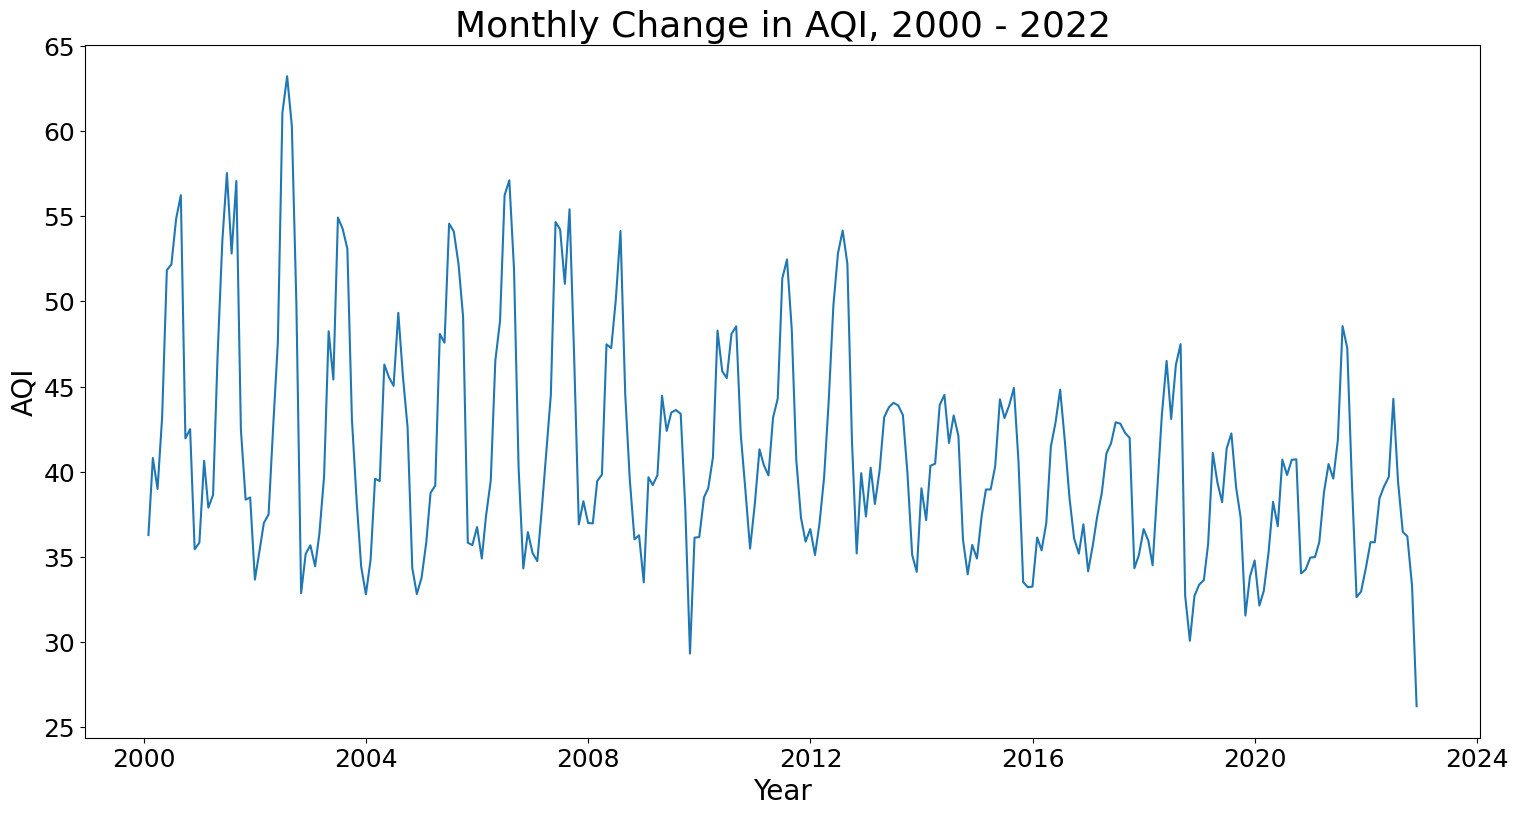

In [27]:
plot_series(df_m, cols=['aqi'], title="Monthly Change in AQI, 2000 - 2022", xlab='Year', ylab = 'AQI')

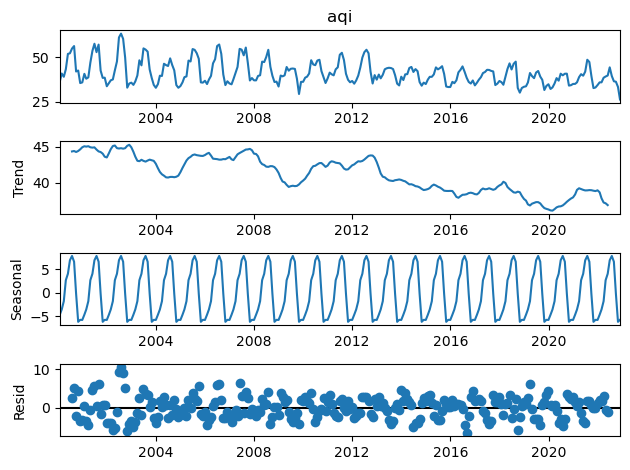

In [28]:
# Decompose time series into trend, seasonal, and residual components.
decomp =seasonal_decompose(df_m['aqi'])

# Plot the decomposed time series.
decomp.plot();

### Weekly Change in AQI, 2000 - 2022

In [29]:
# resample by week
df_w = df_daily_all.resample('W').mean()

In [30]:
df_w.head()

,aqi
date,
2000-01-02,46.294334
2000-01-09,33.216880
2000-01-16,34.257179
2000-01-23,35.589386
2000-01-30,37.251943


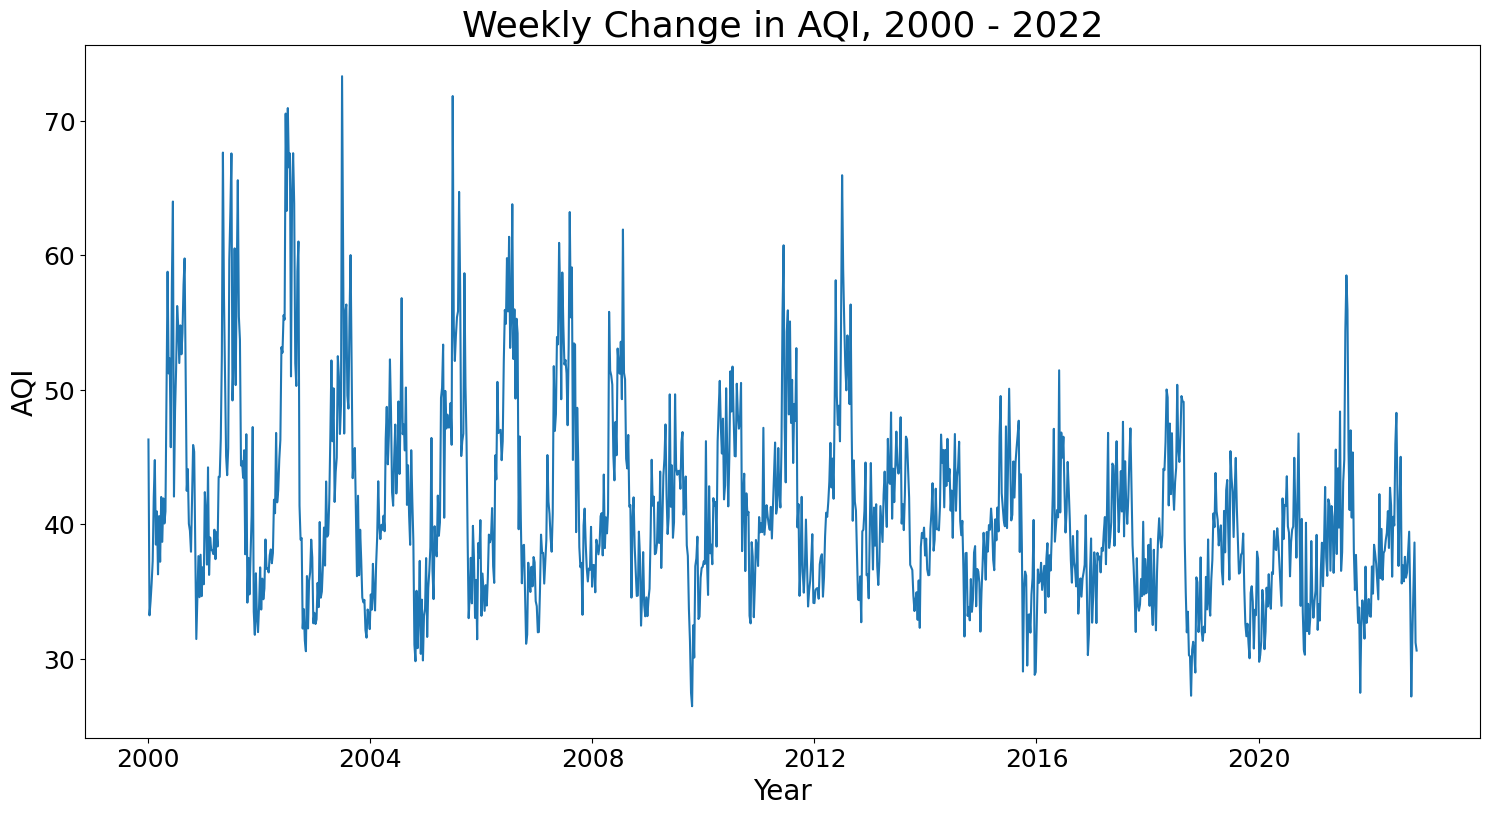

In [31]:
plot_series(df_w, cols=['aqi'], title="Weekly Change in AQI, 2000 - 2022", xlab='Year', ylab = 'AQI')

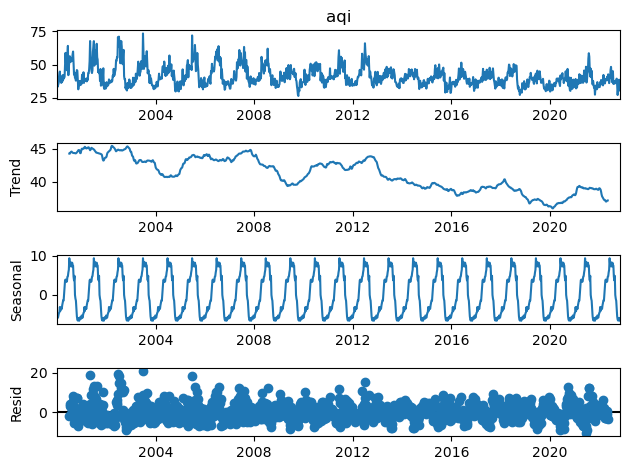

In [32]:
# Decompose time series into trend, seasonal, and residual components.
decomp =seasonal_decompose(df_w['aqi'])

# Plot the decomposed time series.
decomp.plot();

### Daily Change in AQI, 2012 - 2022

In [33]:
df_10_year = df_daily_all.loc['2012-11-02':'2022-11-02']

In [34]:
df_10_year.head()

,aqi
date,
2012-11-02,33.436448
2012-11-03,34.209531
2012-11-04,35.514743
2012-11-05,36.543007
2012-11-06,37.724028


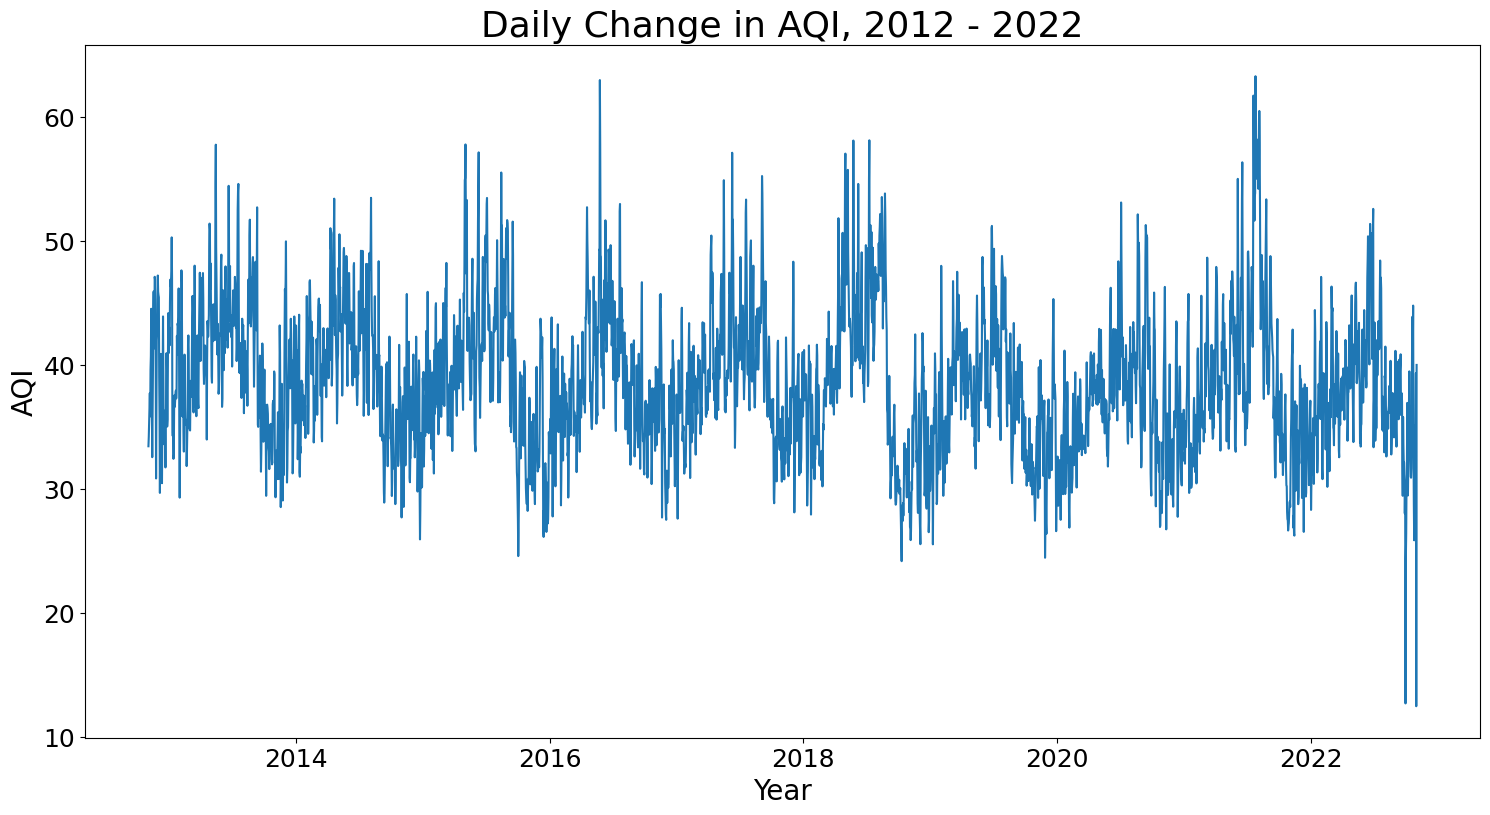

In [35]:
plot_series(df_10_year, cols=['aqi'], title="Daily Change in AQI, 2012 - 2022", xlab='Year', ylab = 'AQI')

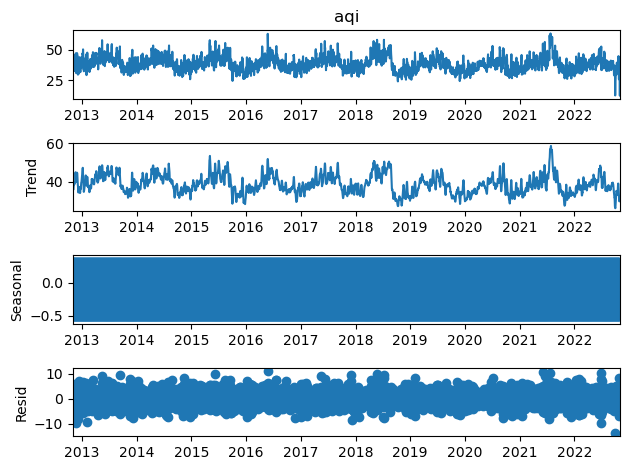

In [36]:
# Decompose time series into trend, seasonal, and residual components.
decomp =seasonal_decompose(df_10_year['aqi'])

# Plot the decomposed time series.
decomp.plot();

### Monthly Change in AQI, 2012 - 2022

In [37]:
# resample by month
df_10_year_m = df_10_year.resample('M').mean()

In [38]:
df_10_year_m.head()

,aqi
date,
2012-11-30,40.150613
2012-12-31,37.370256
2013-01-31,40.232763
2013-02-28,38.104477
2013-03-31,40.090758


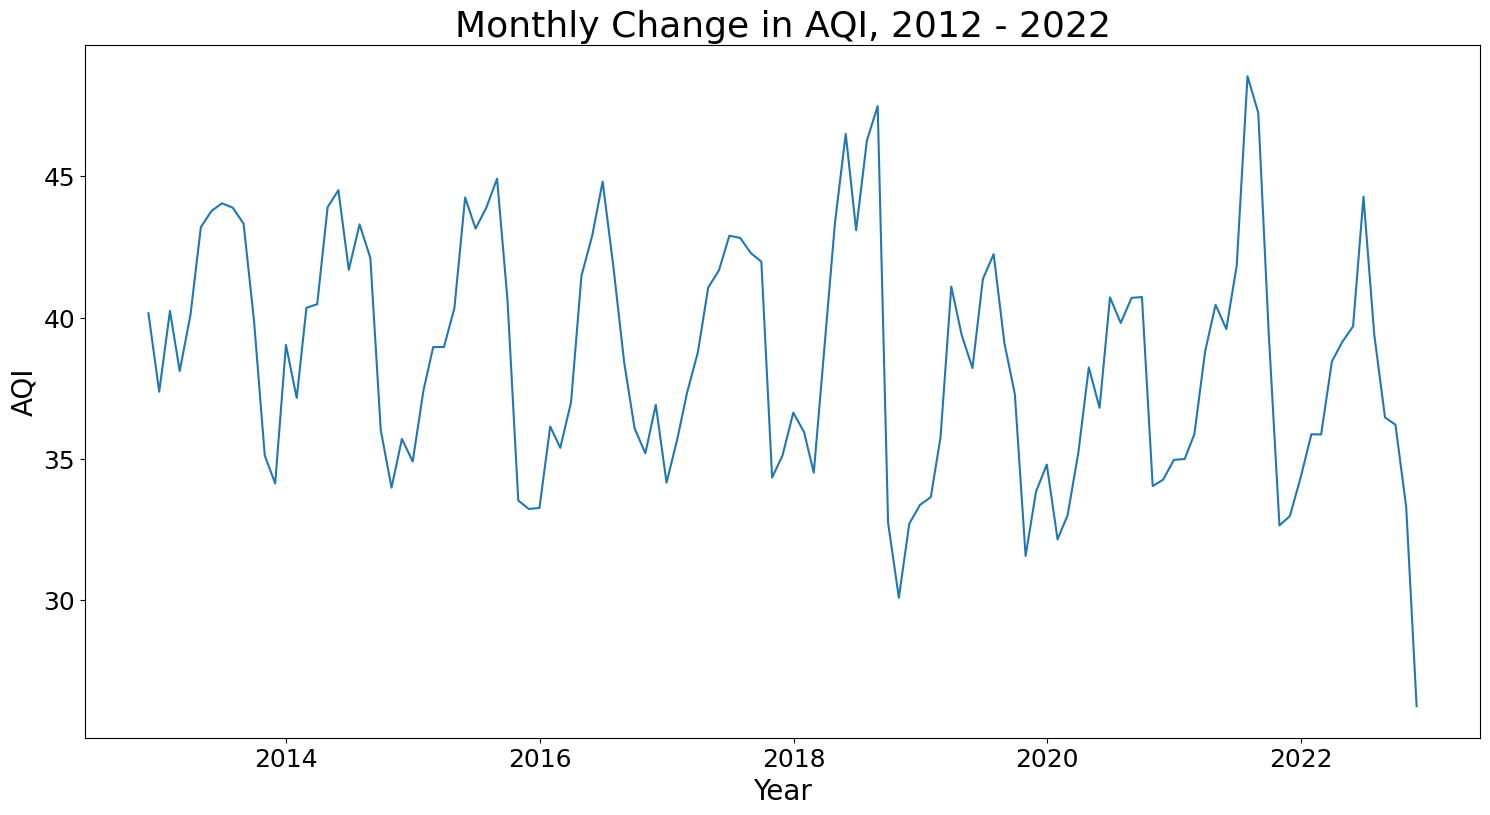

In [39]:
plot_series(df_10_year_m, cols=['aqi'], title="Monthly Change in AQI, 2012 - 2022", xlab='Year', ylab = 'AQI')

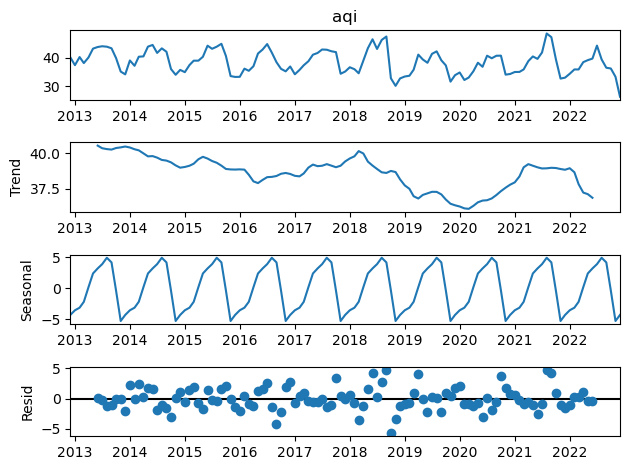

In [40]:
# Decompose time series into trend, seasonal, and residual components.
decomp =seasonal_decompose(df_10_year_m['aqi'])

# Plot the decomposed time series.
decomp.plot();

### Weekly Change in AQI, 2012 - 2022

In [41]:
# resample by week
df_10_year_w = df_10_year.resample('W').mean()

In [42]:
df_10_year_w.head()

,aqi
date,
2012-11-04,34.386907
2012-11-11,39.462404
2012-11-18,39.585609
2012-11-25,40.985412
2012-12-02,44.580652


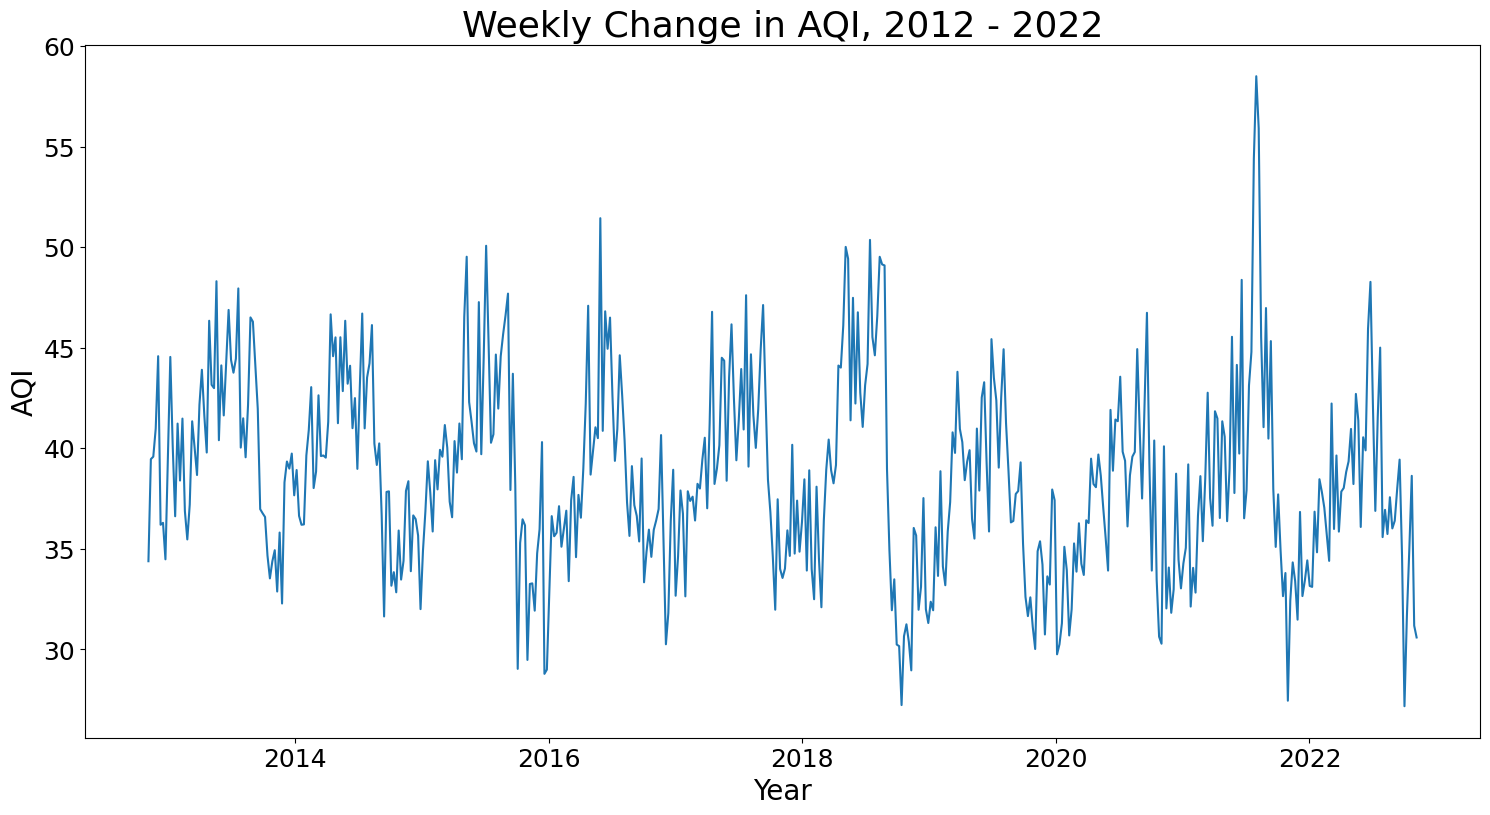

In [43]:
plot_series(df_10_year_w, cols=['aqi'], title="Weekly Change in AQI, 2012 - 2022", xlab='Year', ylab = 'AQI')

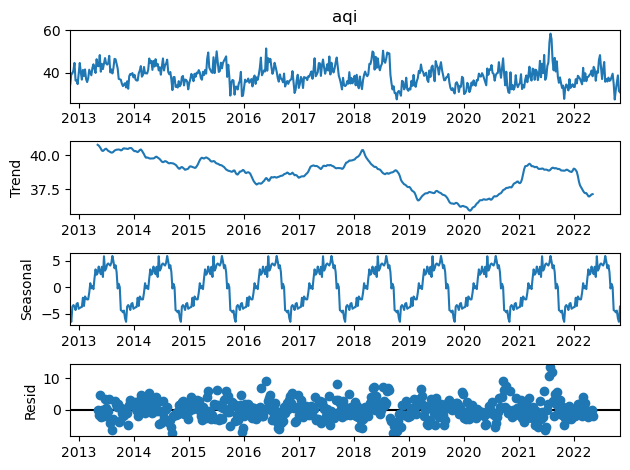

In [44]:
# Decompose time series into trend, seasonal, and residual components.
decomp =seasonal_decompose(df_10_year_w['aqi'])

# Plot the decomposed time series.
decomp.plot();

### Autocorrelation of  Monthly AQI Change 2000-2022

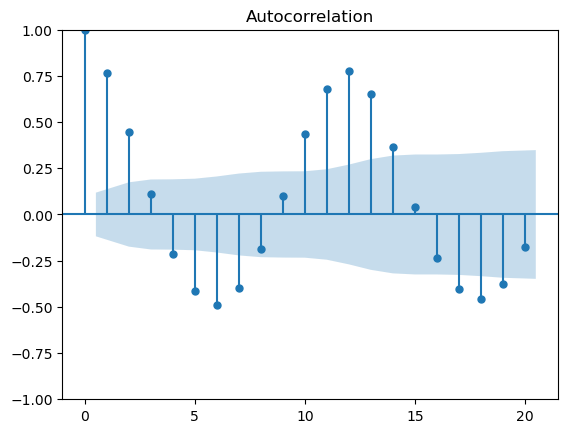

In [45]:
# Generate the ACF plot on AQI data

plot_acf(df_m['aqi'], lags = 20);

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


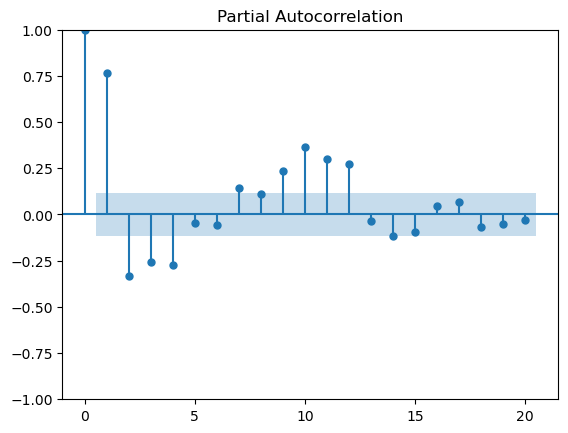

In [46]:
# Generate the PACF plot on AQI data

plot_pacf(df_m['aqi'], lags = 20);

#### Take away:
1. Based on the time plot, there is a trend. Overall, the trend is descreasing.
2. Based on the time plot, there is evidence of seasonality. There appear to be peaks around the summer time about every twelve months. This makes sense, more outdoor activities(traveling by car or plane) and increased usage of air conditioning. 
3. Based on the ACF plot, there is a trend. the coefficient is high at lag 1, 12, 13 and low at lag 6, 7, 8, 17, 18, 19. In terms of the month, high positive correlations for January, November, December, whereas April to August have negative correlations.
4. Based on the ACF and PACF plots, there is evidence of seasonality. In the ACF plot, there is a "scalloped" shape visually and the ACF values peak and bottom roughly every 12 months. In the PACF plot, there are some seasonal fluctuations suggesting by positive and some negative significant partial autocorrelations.

In [47]:
# Generate a dataframe with AQI data 
# adopted from class

# lags AQI by one month
df_m['aqi_lag_1'] = df_m['aqi'].shift(1)
# lags AQI by two month
df_m['aqi_lag_2'] = df_m['aqi'].shift(2)
# lags AQI by one year
df_m['aqi_seasonal'] = df_m['aqi'].shift(12)


In [48]:
# Calculate the correlations among these columns.
df_m.corr()

,aqi,aqi_lag_1,aqi_lag_2,aqi_seasonal
aqi,1.000000,0.772205,0.453723,0.821665
aqi_lag_1,0.772205,1.000000,0.771507,0.715019
aqi_lag_2,0.453723,0.771507,1.000000,0.451364
aqi_seasonal,0.821665,0.715019,0.451364,1.000000


In [49]:
# Create a variable called `time` that takes on a value of 0 in for begining of the data 2000-01-31,
# then increases by 1 each month until the end of the dataframe.
df_m['time'] = range(0, df_m.shape[0])

In [50]:
df_m.head(), df_m.tail()

(                  aqi  aqi_lag_1  aqi_lag_2  aqi_seasonal  time
 date                                                           
 2000-01-31  36.279317        NaN        NaN           NaN     0
 2000-02-29  40.800939  36.279317        NaN           NaN     1
 2000-03-31  38.986306  40.800939  36.279317           NaN     2
 2000-04-30  43.198448  38.986306  40.800939           NaN     3
 2000-05-31  51.832154  43.198448  38.986306           NaN     4,
                   aqi  aqi_lag_1  aqi_lag_2  aqi_seasonal  time
 date                                                           
 2022-07-31  39.393454  44.277896  39.689090     48.548626   270
 2022-08-31  36.459889  39.393454  44.277896     47.256036   271
 2022-09-30  36.202572  36.459889  39.393454     39.475228   272
 2022-10-31  33.286323  36.202572  36.459889     32.634459   273
 2022-11-30  26.229167  33.286323  36.202572     32.966351   274)

### Linear model

In [51]:
# Generate train/test split.
X_train, X_test, y_train, y_test = train_test_split(df_m.drop(columns='aqi'),
                                                    df_m['aqi'],
                                                    test_size = 0.2, shuffle=False)

In [52]:
# Check shape 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((220, 4), (55, 4), (220,), (55,))

In [53]:
# Fit a linear model
# Import statsmodels.
import statsmodels.api as sm

In [54]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# check
X_train.head()

,const,aqi_lag_1,aqi_lag_2,aqi_seasonal,time
date,,,,,
2000-01-31,1.0,NaN,NaN,NaN,0
2000-02-29,1.0,36.279317,NaN,NaN,1
2000-03-31,1.0,40.800939,36.279317,NaN,2
2000-04-30,1.0,38.986306,40.800939,NaN,3
2000-05-31,1.0,43.198448,38.986306,NaN,4


In [55]:
# dfop null value since statsmodels won't be able to handle missing values.

X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

# This way we subset y_train to keep only indices from X_train.

In [56]:
# instantiate the model
lm = sm.OLS(y_train, X_train)

# fit
lm_results = lm.fit()

In [57]:
print(lm_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    aqi   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     186.1
Date:                Thu, 04 May 2023   Prob (F-statistic):           1.02e-66
Time:                        10:59:27   Log-Likelihood:                -525.70
No. Observations:                 208   AIC:                             1061.
Df Residuals:                     203   BIC:                             1078.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.2017      1.847      3.900   

In [58]:
# Generate predicted test values.
lm_results.predict(X_test)

date
2018-05-31    42.701580
2018-06-30    44.067346
2018-07-31    41.221667
2018-08-31    43.674668
2018-09-30    43.435245
2018-10-31    30.596833
2018-11-30    33.141392
2018-12-31    36.107108
2019-01-31    35.490480
2019-02-28    34.757001
2019-03-31    38.179551
2019-04-30    42.971519
2019-05-31    42.190432
2019-06-30    40.223019
2019-07-31    43.961195
2019-08-31    44.290688
2019-09-30    34.804546
2019-10-31    33.203153
2019-11-30    31.591275
2019-12-31    34.707980
2020-01-31    34.827903
2020-02-29    34.084320
2020-03-31    37.929431
2020-04-30    38.156080
2020-05-31    38.775774
2020-06-30    38.754605
2020-07-31    41.853621
2020-08-31    38.749204
2020-09-30    38.590374
2020-10-31    35.506431
2020-11-30    32.692732
2020-12-31    34.987139
2021-01-31    34.010299
2021-02-28    34.276763
2021-03-31    35.898140
2021-04-30    38.904286
2021-05-31    38.416909
2021-06-30    39.452250
2021-07-31    40.536418
2021-08-31    44.354812
2021-09-30    41.917188
2021-10-31 

In [59]:
# Import R2 score and MSE.
from sklearn.metrics import r2_score, mean_squared_error

In [60]:
print(f'R2 Score: {r2_score(y_test, lm_results.predict(X_test))}')
print(f'RMSE: {mean_squared_error(y_test, lm_results.predict(X_test)) ** 0.5}')
print(f'Mean AQI: {y_test.mean()}')

R2 Score: 0.5396414323076086
RMSE: 3.1506202685314855
Mean AQI: 37.68400268476834


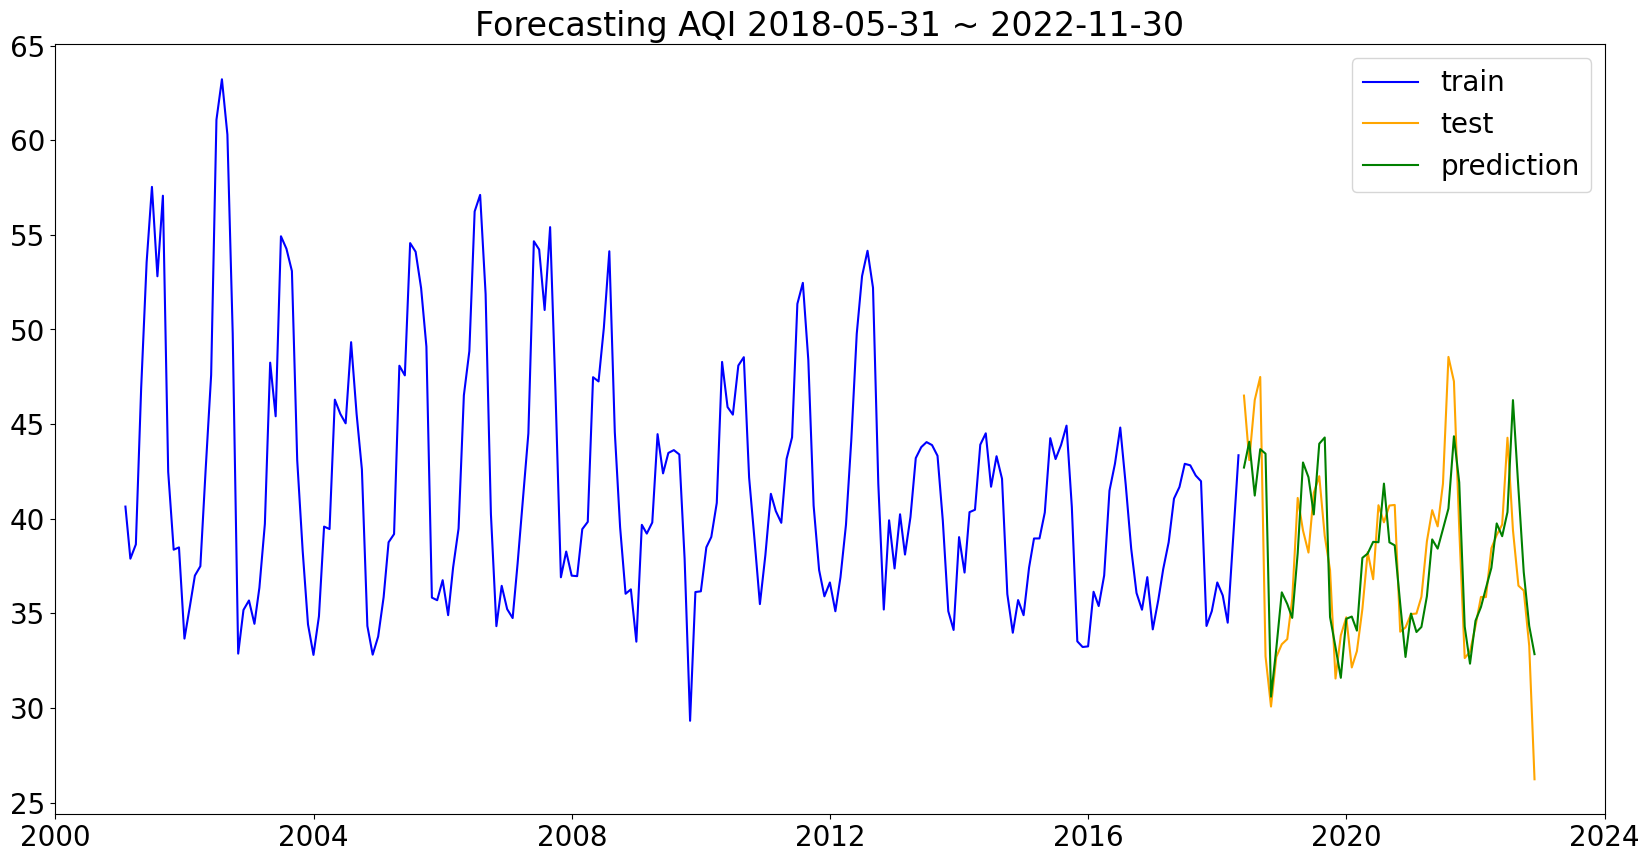

In [61]:
# plot the  predictions; adopted from class

# Set figure size.
plt.figure(figsize=(20,10))

# Plot training data.
plt.plot(y_train.index, y_train.values, color = 'blue', label = 'train')

# Plot testing data.
plt.plot(y_test.index, y_test.values, color = 'orange', label = 'test')

# Plot predicted test values.
plt.plot(lm_results.predict(X_test), color = 'green', label = 'prediction')

# Set label.
plt.title(label = 'Forecasting AQI 2018-05-31 ~ 2022-11-30', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20);

### SARIMA(Seasonal Autoregressive Integrated Moving Average) Model

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# https://pypi.org/project/pmdarima/
!pip install pmdarima
from pmdarima import auto_arima

In [7]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [63]:
# read data
df = pd.read_csv('./output/air_quality_by_county_daily.csv')

# Change date column to be datetime dtype
df['date'] = pd.to_datetime(df['date'])

# groupby 'state' and 'date' to get avg AQI by state
df_daily_state = df.groupby(['state_name', 'date'])['aqi'].mean().reset_index()

# groupby date' to get avg AQI by date
df_daily_all = df_daily_state.groupby(['date'])['aqi'].mean().reset_index()

# Set the index to be date
df_daily_all.set_index('date', inplace=True)

# resample by month
df_m = df_daily_all.resample('M').mean()

In [64]:
df_m.head()

,aqi
date,
2000-01-31,36.279317
2000-02-29,40.800939
2000-03-31,38.986306
2000-04-30,43.198448
2000-05-31,51.832154


In [65]:
df_m.tail()

,aqi
date,
2022-07-31,39.393454
2022-08-31,36.459889
2022-09-30,36.202572
2022-10-31,33.286323
2022-11-30,26.229167


In [66]:
# run auto arima to find the best parameter
auto_arima(y=df_m['aqi'],start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12).summary()

# the best model is: SARIMAX(3, 1, 4)x(1, 0, [1], 12)

C:\ProgramData\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,1,1)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\ProgramData\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\ProgramData\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\P

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  275
Model:             SARIMAX(3, 1, 4)x(1, 0, [1], 12)   Log Likelihood                -669.023
Date:                              Thu, 04 May 2023   AIC                           1358.047
Time:                                      11:03:39   BIC                           1394.178
Sample:                                  01-31-2000   HQIC                          1372.549
                                       - 11-30-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0749      0.060     17.953      0.000       0.958       1.192
ar.L2         -0.0313      0.047     -0.661      0.508      -0.124       0.061
ar.L3         -0.4797      0.049     -9.738      0.000      -0.576      -0.383
ma.L1         -1.5710      0.088    -17.770      0.000      -1.744      -1.398
ma.L2          0.2740      0.114      2.405      0.016       0.051       0.497
ma.L3          0.8256      0.128      6.452      0.000       0.575       1.076
ma.L4         -0.5122      0.084     -6.063      0.000      -0.678      -0.347
ar.S.L12       0.9894      0.009    116.112      0.000       0.973       1.006
ma.S.L12      -0.8689      0.057    -15.172      0.000      -0.981      -0.757
sigma2         7.1461      0.567     12.604      0.000       6.035       8.257
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                20.30
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                            -0.31
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
len(df_m)

275

In [68]:
#split data into train and test:
train = df_m[:220]
test = df_m[220:]

In [70]:
# Fit SARIMA model with the best parameter: (3, 1, 4)x(1, 0, [1], 12)
sarima = SARIMAX(train.astype(float).dropna() , order = (3, 1, 4), seasonal_order = (1, 0, 1, 12))

# Fit SARIMA model.
model = sarima.fit()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [71]:
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                  aqi   No. Observations:                  220
Model:             SARIMAX(3, 1, 4)x(1, 0, [1], 12)   Log Likelihood                -537.313
Date:                              Thu, 04 May 2023   AIC                           1094.626
Time:                                      11:05:07   BIC                           1128.517
Sample:                                  01-31-2000   HQIC                          1108.313
                                       - 04-30-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0597      0.244      4.347      0.000       0.582       1.537
ar.L2          0.06

In [75]:
# obtain predicted values
predictions = model.predict(start=220, end=274, typ='levels').rename('Predictions')

In [73]:
# obtain forecasted values
feature_forecasts = model.predict(start=275, end=300, typ='levels').rename('feature_forecasts')

In [76]:
train.shape, test.shape, predictions.shape

((220, 1), (55, 1), (55,))

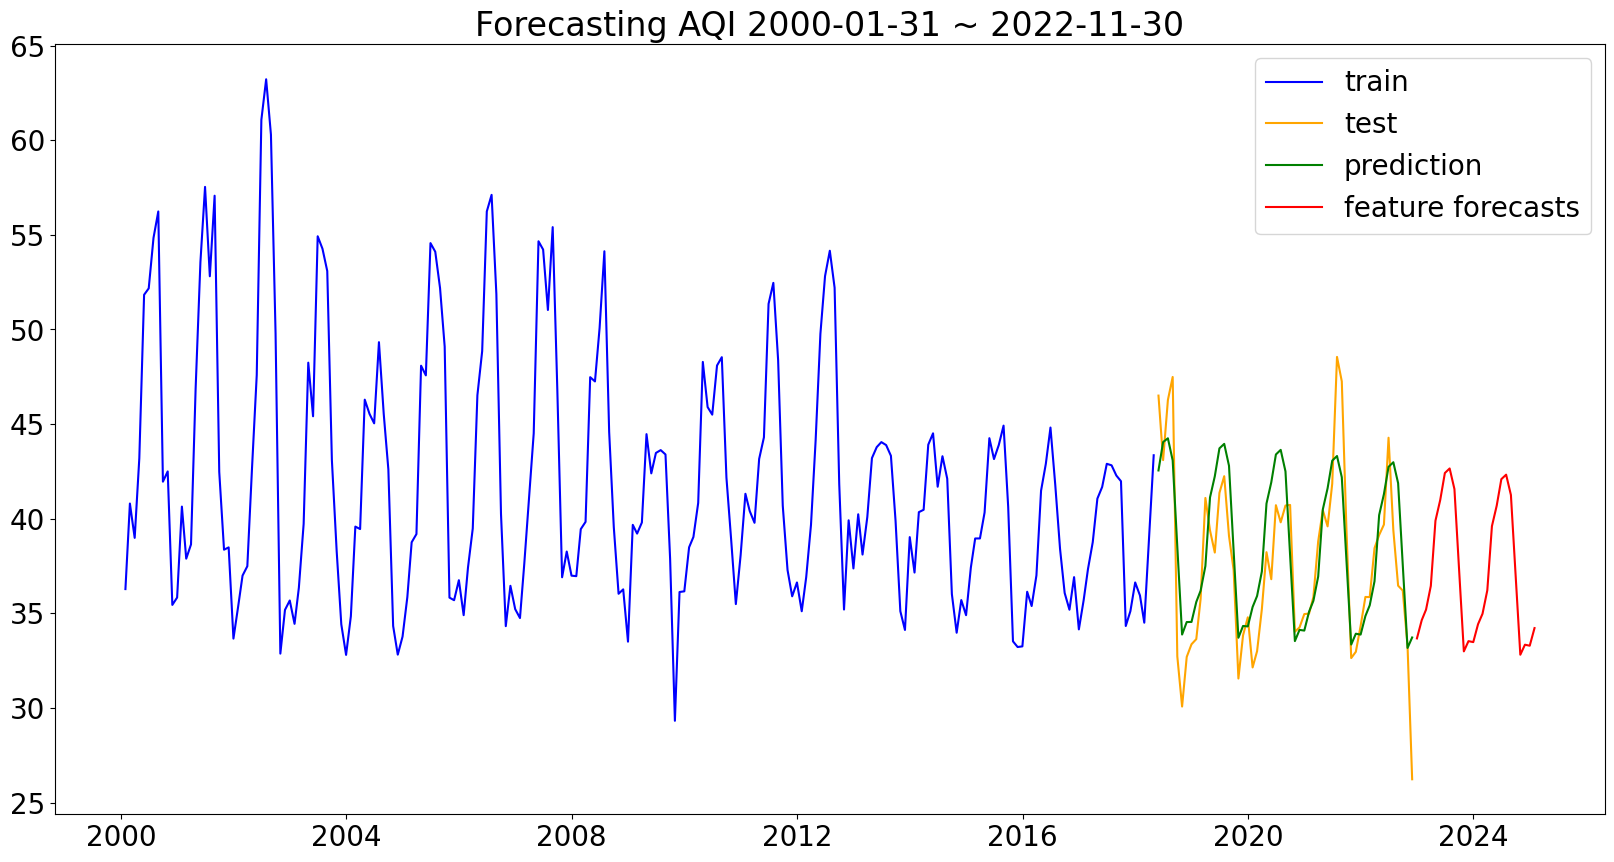

In [77]:
# plot predictions ad feature forecasts

# Set figure size.
plt.figure(figsize=(20,10))

# Plot training data.
plt.plot(train.index, train.values, color = 'blue', label = 'train')

# Plot testing data.
plt.plot(test.index, test.values, color = 'orange', label = 'test')

# Plot predicted test values.
plt.plot(predictions, color = 'green', label = 'prediction')

# Plot predicted test values.
plt.plot(feature_forecasts, color = 'red', label = 'feature forecasts')

# Set label.
plt.title(label = 'Forecasting AQI 2000-01-31 ~ 2022-11-30', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20);

In [78]:
print(f'R2 Score: {r2_score(test, predictions)}')
print(f'RMSE: {np.sqrt(mean_squared_error(test, predictions))}')
print(f'Mean AQI: {test.mean()}')

R2 Score: 0.6430450517906428
RMSE: 2.7743078505198993
Mean AQI: aqi    37.684003
dtype: float64


#### Take away:
The predicted values are fairly close to our actual values using SARIMA with RMSE score of 2.77. Using this model to forcasts AQI value for 2023 and 2024 seems promising. Originally, we planned to use EV car registration as an external variable; however, we don't have the monthly data forEV car registration. 